In [158]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
from scipy.stats import linregress

In [46]:
pop_df = pd.read_csv("Resources/can_pop_for_grad.csv")
pop_df = pop_df[["REF_DATE","GEO","VALUE","Age group"]]
clean_pop_df = pop_df.loc[pop_df["Age group"]=="All ages"]
clean_pop_df = clean_pop_df.rename(columns={"VALUE":"Population","REF_DATE":"Year"})
clean_pop_df = clean_pop_df.drop(columns=["Age group"])
clean_pop_df.dtypes

Year            int64
GEO            object
Population    float64
dtype: object

In [49]:
grad_df= pd.read_csv("Resources/graduation_rate.csv")
grad_df= grad_df[["REF_DATE","GEO","Age","VALUE"]]
canada_grad = grad_df.loc[grad_df["GEO"]=="Canada"]
canada_grad = canada_grad.rename(columns={"REF_DATE":"Year","VALUE":"Graduates"})
canada_grad = canada_grad.drop(columns=["Age"])
canada_grad = canada_grad.replace({"2002/2003":"2003","2003/2004":"2004","2004/2005":"2005","2005/2006":"2006",
                                  "2006/2007":"2007","2007/2008":"2008","2008/2009":"2009","2009/2010":"2010",
                                  "2010/2011":"2011","2011/2012":"2012","2012/2013":"2013","2013/2014":"2014",
                                  "2014/2015":"2015","2015/2016":"2016","2016/2017":"2017","2017/2018":"2018",
                                  "2018/2019":"2019"})
canada_grad["Year"]=canada_grad["Year"].astype(int)
canada_grad["Graduates"]=canada_grad["Graduates"].astype(float)
can_grad_pop = pd.merge(canada_grad,clean_pop_df,on="Year",how="outer")
can_grad_pop = can_grad_pop.drop(columns=["GEO_y"])
can_grad_pop = can_grad_pop.rename(columns={"GEO_x":"Country"})
can_grad_pop["Grads per 100000"] = round((can_grad_pop["Graduates"]/can_grad_pop["Population"])*100000,0)
can_grad_pop

,Year,Country,Graduates,Population,Grads per 100000
0,2003,Canada,307899.0,31644028.0,973.0
1,2004,Canada,286344.0,31940655.0,896.0
2,2005,Canada,288921.0,32243753.0,896.0
3,2006,Canada,285111.0,32571174.0,875.0
4,2007,Canada,293145.0,32889025.0,891.0
5,2008,Canada,303711.0,33247118.0,913.0
6,2009,Canada,314196.0,33628895.0,934.0
7,2010,Canada,320616.0,34004889.0,943.0
8,2011,Canada,320718.0,34339328.0,934.0
9,2012,Canada,322257.0,34714222.0,928.0


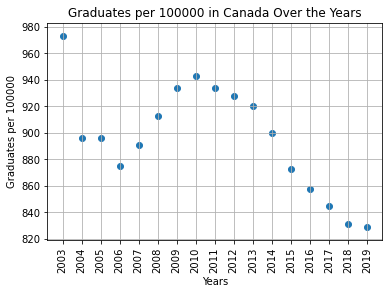

In [66]:
plt.scatter(can_grad_pop["Year"],can_grad_pop["Grads per 100000"])
plt.ylim(min(can_grad_pop["Grads per 100000"])-10,max(can_grad_pop["Grads per 100000"])+10)
plt.xticks(can_grad_pop["Year"],rotation="vertical")
plt.ylabel("Graduates per 100000")
plt.xlabel("Years")
plt.grid()
plt.title("Graduates per 100000 in Canada Over the Years")
plt.show()

In [89]:
can_df = pd.read_csv("Resources/cannabis_usage_1961_2018.csv")
can_df = can_df[["REF_DATE","GEO","Frequency of use","VALUE","Age group",'Prevalence']]
clean_cannabis = can_df.loc[(can_df["REF_DATE"]>=2003)&(can_df["Frequency of use"]=="Total, all frequencies")&(can_df["Age group"]=="15 years and over")&(can_df["Prevalence"]=="Consuming population of cannabis"),:]
new_can = clean_cannabis.reset_index()
new_can = new_can.drop(columns=["index","Frequency of use","Prevalence","Age group"])
new_can = new_can.rename(columns={"REF_DATE":"Year","VALUE":"Cannabis Consumers"})
new_can


,Year,GEO,Cannabis Consumers
0,2003,Canada,3243170.0
1,2004,Canada,3307343.0
2,2005,Canada,3364916.0
3,2006,Canada,3421040.0
4,2007,Canada,3481937.0
5,2008,Canada,3553704.0
6,2009,Canada,3641689.0
7,2010,Canada,3749195.0
8,2011,Canada,3878262.0
9,2012,Canada,4027093.0


In [97]:
grad_can = pd.merge(new_can,can_grad_pop,on="Year",how="outer")
grad_can = grad_can.drop(16)
grad_can = grad_can.drop(columns=["GEO"])
grad_can["Cannabis Consumers per 100000"] = round((grad_can["Cannabis Consumers"]/grad_can["Population"])*100000,0)
grad_can = grad_can[["Year","Country","Population","Graduates","Cannabis Consumers","Grads per 100000","Cannabis Consumers per 100000"]]
grad_can

,Year,Country,Population,Graduates,Cannabis Consumers,Grads per 100000,Cannabis Consumers per 100000
0,2003,Canada,31644028.0,307899.0,3243170.0,973.0,10249.0
1,2004,Canada,31940655.0,286344.0,3307343.0,896.0,10355.0
2,2005,Canada,32243753.0,288921.0,3364916.0,896.0,10436.0
3,2006,Canada,32571174.0,285111.0,3421040.0,875.0,10503.0
4,2007,Canada,32889025.0,293145.0,3481937.0,891.0,10587.0
5,2008,Canada,33247118.0,303711.0,3553704.0,913.0,10689.0
6,2009,Canada,33628895.0,314196.0,3641689.0,934.0,10829.0
7,2010,Canada,34004889.0,320616.0,3749195.0,943.0,11025.0
8,2011,Canada,34339328.0,320718.0,3878262.0,934.0,11294.0
9,2012,Canada,34714222.0,322257.0,4027093.0,928.0,11601.0


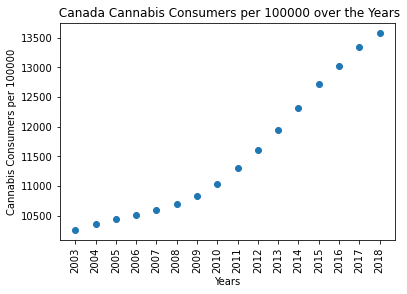

In [101]:
plt.scatter(grad_can["Year"],grad_can["Cannabis Consumers per 100000"])
plt.xticks(grad_can["Year"],rotation="vertical")
plt.ylabel("Cannabis Consumers per 100000")
plt.xlabel("Years")
plt.title(" Canada Cannabis Consumers per 100000 over the Years")
plt.show()

In [162]:
slope,intercept,rvalue,pvalue,sems = linregress(grad_can["Cannabis Consumers per 100000"],grad_can["Grads per 100000"])
regress_values= (slope*grad_can["Cannabis Consumers per 100000"]) + intercept
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The correlation coefficient for cannabis consumers and graduates is -0.67


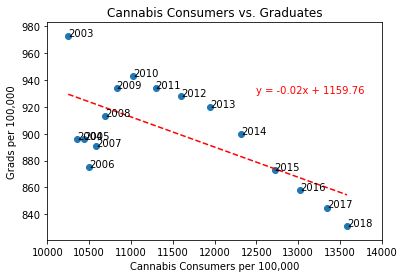

In [172]:
fig,ax = plt.subplots()
ax.scatter(grad_can["Cannabis Consumers per 100000"],grad_can["Grads per 100000"])
for i, txt in enumerate(grad_can["Year"]):
    ax.annotate(txt, (grad_can["Cannabis Consumers per 100000"][i],grad_can["Grads per 100000"][i]))
plt.ylim(min(grad_can["Grads per 100000"])-10,max(grad_can["Grads per 100000"])+10)
plt.xlim(min(grad_can["Cannabis Consumers per 100000"])-250,max(grad_can["Cannabis Consumers per 100000"])+420)
plt.plot(grad_can["Cannabis Consumers per 100000"],regress_values, "r--")
plt.annotate(eq,(12500,930),color="red")
plt.ylabel("Grads per 100,000")
plt.xlabel("Cannabis Consumers per 100,000")
plt.title("Cannabis Consumers vs. Graduates")
print(f'The correlation coefficient for cannabis consumers and graduates is {str(round(rvalue,2))}')
plt.show()